In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from geospatial import *

In [3]:
# DTW similarity measure

# For input: curves
# Function: Generate curve with segments group (primarily from pointgroup)


# Function: Calculate dtw distance and generate dtw distance matrix
## Need to use euclidean distance calculation method directly

# Function: Find the shortest dtw between two curves according to the distance matrix


# Function: Normalize and get relative similarity measure result

# For output:
# Similarity metric between two input curves


# Function: For visualizing curves

# Function: For visualizing relative similarity between curves



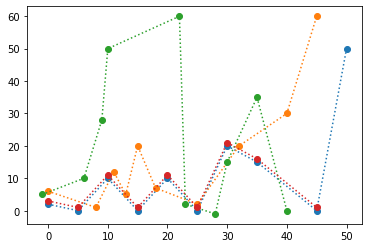

In [69]:
# Curve from pointgroup
data_pointgroup1 = [[0,2], [5,0], [10,10], [15,0], [20,10], [25, 0], [30, 20], [35, 15], [45, 0], [50, 50]]
data_pointgroup4 = [[0,3], [5,1], [10,11], [15,1], [20,11], [25, 1], [30, 21], [35, 16], [45, 1]]
data_pointgroup5 = [[0,3], [5,0], [10,10], [15,0], [20,10], [25, 0], [30, 20], [35, 15], [45, 0], [50, 50]]
data_pointgroup6 = [[-1,2],[0,2], [5,0], [10,10], [15,0], [20,10], [25, 0], [30, 20], [35, 15], [45, 0], [50, 50]]

data_pointgroup7 = [[0,0], [2,0], [4,0], [6,0]]
data_pointgroup8 = [[0,0], [4,0], [6,0]]
data_pointgroup9 = [[0,0], [1,0], [4,0], [6,0]]



data_pointgroup2 = [[0,6], [8,1], [11,12], [13,5], [15,20], [18, 7], [25, 2], [32, 20], [40, 30], [45, 60]]
data_pointgroup3 = [[-1,5], [6,10], [9,28], [10,50], [22,60], [23, 2], [28, -1], [30, 15], [35, 35], [40, 0]]

curve1 = []
for i in range(len(data_pointgroup1)):
    p = Point(data_pointgroup1[i][0], data_pointgroup1[i][1])
    curve1.append(p)
curve1
x1 = [i.x for i in curve1]
y1 = [i.y for i in curve1]
plt.plot(x1, y1, linestyle="dotted", marker="o")


curve2 = []
for i in range(len(data_pointgroup2)):
    p = Point(data_pointgroup2[i][0], data_pointgroup2[i][1])
    curve2.append(p)
curve2
x2 = [i.x for i in curve2]
y2 = [i.y for i in curve2]
plt.plot(x2, y2, linestyle="dotted", marker="o")

curve3 = []
for i in range(len(data_pointgroup3)):
    p = Point(data_pointgroup3[i][0], data_pointgroup3[i][1])
    curve3.append(p)
curve3
x3 = [i.x for i in curve3]
y3 = [i.y for i in curve3]
plt.plot(x3, y3, linestyle="dotted", marker="o")

curve4 = []
for i in range(len(data_pointgroup4)):
    p = Point(data_pointgroup4[i][0], data_pointgroup4[i][1])
    curve4.append(p)
curve4
x4 = [i.x for i in curve4]
y4 = [i.y for i in curve4]
plt.plot(x4, y4, linestyle="dotted", marker="o")


In [34]:
from __future__ import division
import numpy as np
from scipy.spatial import distance
# from scipy.spatial import minkowski_distance

In [39]:
def dtw(exp_data, num_data, metric='euclidean'):
    c = distance.cdist(exp_data, num_data, metric=metric)

    d = np.zeros(c.shape)
    d[0, 0] = c[0, 0]
    n, m = c.shape
    for i in range(1, n):
        d[i, 0] = d[i-1, 0] + c[i, 0]
    for j in range(1, m):
        d[0, j] = d[0, j-1] + c[0, j]
    for i in range(1, n):
        for j in range(1, m):
            d[i, j] = c[i, j] + min((d[i-1, j], d[i, j-1], d[i-1, j-1]))
    return d[-1, -1], d

def dtw_path(d):
    path = []
    i, j = d.shape
    i = i - 1
    j = j - 1
    path.append((i, j))
    while i > 0 or j > 0:
        if i == 0:
            j = j - 1
        elif j == 0:
            i = i - 1
        else:
            temp_step = min([d[i-1, j], d[i, j-1], d[i-1, j-1]])
            if d[i-1, j] == temp_step:
                i = i - 1
            elif d[i, j-1] == temp_step:
                j = j - 1
            else:
                i = i - 1
                j = j - 1
        path.append((i, j))
    path = np.array(path)
    # reverse the order of path, such that it starts with [0, 0]
    return path[::-1]

In [42]:
 r,d =  dtw(data_pointgroup1, data_pointgroup2, metric = 'euclidean')

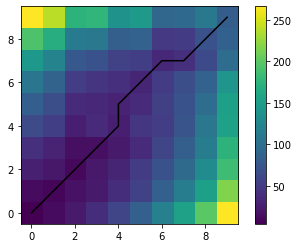

In [44]:
path = dtw_path(d)
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(d.T, origin='lower')
plt.plot(path[:, 0], path[:, 1], '-k')
plt.colorbar()
plt.show()

In [45]:
dtw(data_pointgroup1, data_pointgroup2, metric = 'euclidean')

(80.99450604160096,
 array([[  4.        ,  12.06225775,  26.9283265 ,  40.26999056,
          63.70073959,  82.38228128, 107.38228128, 144.09740078,
         192.92362324, 266.33343185],
        [ 11.81024968,   7.16227766,  20.57868553,  30.01266666,
          52.37334643,  67.13816949,  87.23792073, 120.83851597,
         166.93623825, 239.04726376],
        [ 22.58057929,  16.38182212,   9.39834564,  15.22929753,
          26.40963742,  34.95364117,  51.95364117,  76.11973311,
         112.17524587, 173.20802395],
        [ 38.73607371,  23.45288993,  22.04745628,  14.78351044,
          34.78351044,  34.02541053,  44.22344955,  70.47225905,
         109.52350743, 176.60554675],
        [ 59.13215177,  38.45288993,  31.26700074,  23.38583571,
          25.96385033,  29.56940161,  39.00338274,  54.62388209,
          82.90815334, 138.80985278],
        [ 84.84207203,  55.4822763 ,  49.70608965,  36.38583571,
          45.74651549,  35.86334527,  31.56940161,  52.75902171,
          

In [47]:
dtw(data_pointgroup1, data_pointgroup3, metric = 'euclidean')

(218.51017169784328,
 array([[  3.16227766,  13.16227766,  40.67591064,  89.70651333,
         151.73876301, 174.73876301, 202.89901869, 235.59458414,
         283.69863802, 323.74860681],
        [ 10.97252734,  13.21215328,  41.44654891,  90.92528875,
         152.06836064, 169.84953329, 192.87126215, 222.02602163,
         268.12374391, 303.12374391],
        [ 23.05557331,  14.97252734,  31.23990966,  71.23990966,
         122.65975019, 137.92408771, 159.01911082, 179.63463895,
         214.98997801, 246.61275461],
        [ 39.81862792,  28.42615138,  43.60816946,  81.48928776,
         131.6468629 , 130.90596144, 143.94436625, 165.15756968,
         205.46885843, 230.46885843],
        [ 61.40566107,  42.42615138,  49.52117449,  84.83922572,
         131.52927178, 139.44996518, 144.50743195, 155.12470614,
         184.27946561, 206.64014539],
        [ 87.88206566,  63.89706194,  74.67518238, 101.72270704,
         144.9141789 , 134.3576989 , 137.51997656, 153.33136486,
         

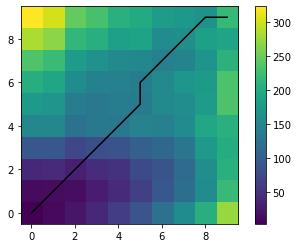

In [49]:
r1,d1 =  dtw(data_pointgroup1, data_pointgroup3, metric = 'euclidean')
path1 = dtw_path(d1)
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(d1.T, origin='lower')
plt.plot(path1[:, 0], path1[:, 1], '-k')
plt.colorbar()
plt.show()

In [50]:
dtw(data_pointgroup1, data_pointgroup1, metric = 'euclidean')

(0.0,
 array([[  0.        ,   5.38516481,  18.19141328,  33.32415923,
          54.86481846,  79.94469087, 114.93040224, 152.26671164,
         197.31113416, 266.62202797],
        [  5.38516481,   0.        ,  11.18033989,  21.18033989,
          39.20809626,  59.20809626,  91.22371745, 124.76473711,
         164.76473711, 232.03285735],
        [ 18.19141328,  11.18033989,   0.        ,  11.18033989,
          21.18033989,  39.20809626,  61.56877604,  87.06387361,
         123.46442305, 180.03296555],
        [ 33.32415923,  21.18033989,  11.18033989,   0.        ,
          11.18033989,  21.18033989,  46.18033989,  71.18033989,
         101.18033989, 162.21311797],
        [ 54.86481846,  39.20809626,  21.18033989,  11.18033989,
           0.        ,  11.18033989,  25.32247551,  41.13386381,
          68.05968785, 118.05968785],
        [ 79.94469087,  59.20809626,  39.20809626,  21.18033989,
          11.18033989,   0.        ,  20.61552813,  38.64328451,
          58.64328451, 1

In [54]:
dtw(data_pointgroup1, data_pointgroup4, metric = 'euclidean')

(58.25444142409901,
 array([[  1.        ,   6.09901951,  19.55264356,  34.58593994,
          56.51765214,  81.53764414, 117.04820595, 154.7443596 ,
         199.75546934],
        [  6.83095189,   2.        ,  14.08304597,  24.13292159,
          42.73399683,  62.75898123,  95.40863666, 129.40863666,
         169.42113471],
        [ 19.03750751,  12.29563014,   3.        ,  13.29563014,
          23.34550576,  40.83836145,  63.66378587,  89.37370613,
         125.51232813],
        [ 34.33456605,  22.34550576,  15.08304597,   4.        ,
          16.08304597,  26.13292159,  51.9398974 ,  77.55239435,
         107.56905639],
        [ 55.52418615,  39.83836145,  25.13292159,  14.29563014,
           5.        ,  15.29563014,  30.16169889,  46.31719331,
          72.88785382],
        [ 80.70354278,  59.86334584,  43.73399683,  24.34550576,
          17.08304597,   6.        ,  27.58703314,  46.45499541,
          66.3421777 ],
        [115.18542207,  91.26398278,  65.66570903,  48.5

In [57]:
dtw(data_pointgroup1, data_pointgroup5, metric = 'euclidean')

(1.0,
 array([[  1.        ,   6.38516481,  19.19141328,  34.32415923,
          55.86481846,  80.94469087, 115.93040224, 153.26671164,
         198.31113416, 267.62202797],
        [  6.83095189,   1.        ,  12.18033989,  22.18033989,
          40.20809626,  60.20809626,  92.22371745, 125.76473711,
         165.76473711, 233.03285735],
        [ 19.03750751,  12.18033989,   1.        ,  12.18033989,
          22.18033989,  40.20809626,  62.56877604,  88.06387361,
         124.46442305, 181.03296555],
        [ 34.33456605,  22.18033989,  12.18033989,   1.        ,
          12.18033989,  22.18033989,  47.18033989,  72.18033989,
         102.18033989, 163.21311797],
        [ 55.52418615,  40.20809626,  22.18033989,  12.18033989,
           1.        ,  12.18033989,  26.32247551,  42.13386381,
          69.05968785, 119.05968785],
        [ 80.70354278,  60.20809626,  40.20809626,  22.18033989,
          12.18033989,   1.        ,  21.61552813,  39.64328451,
          59.64328451, 1

In [62]:
dtw(data_pointgroup6, data_pointgroup1, metric = 'euclidean')

(1.0,
 array([[  1.        ,   7.32455532,  20.92602583,  37.05054133,
          59.52274638,  85.599556  , 121.44645266, 159.72177108,
         205.76522881, 275.80093399],
        [  1.        ,   6.38516481,  19.19141328,  34.32415923,
          55.86481846,  80.94469087, 115.93040224, 153.26671164,
         198.31113416, 267.62202797],
        [  6.38516481,   1.        ,  12.18033989,  22.18033989,
          40.20809626,  60.20809626,  92.22371745, 125.76473711,
         165.76473711, 233.03285735],
        [ 19.19141328,  12.18033989,   1.        ,  12.18033989,
          22.18033989,  40.20809626,  62.56877604,  88.06387361,
         124.46442305, 181.03296555],
        [ 34.32415923,  22.18033989,  12.18033989,   1.        ,
          12.18033989,  22.18033989,  47.18033989,  72.18033989,
         102.18033989, 163.21311797],
        [ 55.86481846,  40.20809626,  22.18033989,  12.18033989,
           1.        ,  12.18033989,  26.32247551,  42.13386381,
          69.05968785, 1

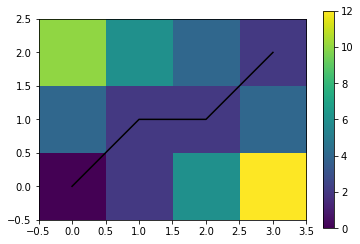

In [68]:
dtw(data_pointgroup7, data_pointgroup8, metric = 'euclidean')
r2,d2 =  dtw(data_pointgroup7, data_pointgroup8, metric = 'euclidean')
path2 = dtw_path(d2)
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(d2.T, origin='lower')
plt.plot(path2[:, 0], path2[:, 1], '-k')
plt.colorbar()
plt.show()

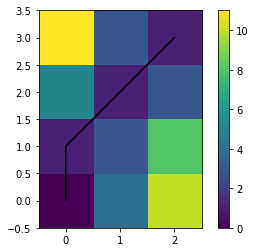

1.0

In [71]:
dtw(data_pointgroup8, data_pointgroup9, metric = 'euclidean')
r2,d2 =  dtw(data_pointgroup8, data_pointgroup9, metric = 'euclidean')
path2 = dtw_path(d2)
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(d2.T, origin='lower')
plt.plot(path2[:, 0], path2[:, 1], '-k')
plt.colorbar()
plt.show()
r2